In [ ]:
import pandas as pd
from PIL import Image
from io import BytesIO
import requests

In [2]:
df = pd.read_csv('/kaggle/input/newspaper/newspapers_no_ocr.csv')

In [3]:
df["newspaper"] = df["newspaper_title"].apply(lambda x: x.split('/')[0])
df["year"] = df["newspaper_title"].apply(lambda x: x.split('/')[1])
df['page']  = df["newspaper_title"].apply(lambda x: x.split('/')[-1][0])
db = df.drop(['newspaper_year','newspaper_title','newspaper_url','year'],axis=1)
db

,newspaper_date,origin_img,newspaper,page
0,01-01-1934,http://electrohelp.ebook.nekrasovka.ru/books/n...,Вечерняя Москва,1
1,01-01-1934,http://electrohelp.ebook.nekrasovka.ru/books/n...,Вечерняя Москва,2
2,01-01-1934,http://electrohelp.ebook.nekrasovka.ru/books/n...,Вечерняя Москва,3
3,01-01-1934,http://electrohelp.ebook.nekrasovka.ru/books/n...,Вечерняя Москва,4
4,03-01-1934,http://electrohelp.ebook.nekrasovka.ru/books/n...,Вечерняя Москва,1
...,...,...,...,...
15913,30-12-1939,http://electrohelp.ebook.nekrasovka.ru/books/s...,Правда,2
15914,30-12-1939,http://electrohelp.ebook.nekrasovka.ru/books/s...,Правда,3
15915,30-12-1939,http://electrohelp.ebook.nekrasovka.ru/books/s...,Правда,4
15916,30-12-1939,http://electrohelp.ebook.nekrasovka.ru/books/s...,Правда,5


# BOX DETECTION

In [4]:
def box_detection(irl) -> '[boxes]':
    #response = requests.get(irl)
    #img = Image.open(BytesIO(response.content))
    #ваш код чтобы получить боксы
    return 'Допишите код'

In [35]:
db['boxes'] = db['origin_img'].map(box_detection)
db

,newspaper_date,origin_img,newspaper,page,boxes
0,01-01-1934,http://electrohelp.ebook.nekrasovka.ru/books/n...,Вечерняя Москва,1,Допишите код
1,01-01-1934,http://electrohelp.ebook.nekrasovka.ru/books/n...,Вечерняя Москва,2,Допишите код
2,01-01-1934,http://electrohelp.ebook.nekrasovka.ru/books/n...,Вечерняя Москва,3,Допишите код
3,01-01-1934,http://electrohelp.ebook.nekrasovka.ru/books/n...,Вечерняя Москва,4,Допишите код
4,03-01-1934,http://electrohelp.ebook.nekrasovka.ru/books/n...,Вечерняя Москва,1,Допишите код
...,...,...,...,...,...
15913,30-12-1939,http://electrohelp.ebook.nekrasovka.ru/books/s...,Правда,2,Допишите код
15914,30-12-1939,http://electrohelp.ebook.nekrasovka.ru/books/s...,Правда,3,Допишите код
15915,30-12-1939,http://electrohelp.ebook.nekrasovka.ru/books/s...,Правда,4,Допишите код
15916,30-12-1939,http://electrohelp.ebook.nekrasovka.ru/books/s...,Правда,5,Допишите код


# OCR

In [6]:
import os
import requests

folder_id = os.environ['folder_id']
api_key = os.environ['api_key']

def call_api(url, data):
    headers = { "Authorization" : f"Api-Key {api_key}" }
    return requests.post(url, json=data, headers=headers).json()

def call_api_get(url, data):
    headers = { "Authorization" : f"Api-Key {api_key}" }
    return requests.get(url, headers=headers).json()

def ocr(img):
    buffer = BytesIO()
    img.save(buffer,format="JPEG")
    myimage = buffer.getvalue()

    j = {
      "mimeType": "JPEG",
      "languageCodes": ["ru"],
      "model": "page",
      "content": base64.b64encode(myimage).decode('utf-8')
    }
    res = call_api("https://ocr.api.cloud.yandex.net/ocr/v1/recognizeText",j)
    return res


def get_ocr_results(boxed_img_list) -> 'На вход даем список, содержащий IMG':
    for img in boxed_img_list:
        ocr(img)
    return 

KeyError: 'folder_id'

In [88]:
dc = db.groupby('newspaper_date').count().iloc[:,:1].reset_index()
dc['Дата'] = pd.to_datetime(dc['newspaper_date'], format='%d-%m-%Y')
dc['Кол-во страниц'] = dc['origin_img']

In [89]:
dc

,newspaper_date,origin_img,Дата,Кол-во страниц
0,01-01-1934,4,1934-01-01,4
1,01-01-1935,10,1935-01-01,10
2,01-01-1937,6,1937-01-01,6
3,01-01-1938,6,1938-01-01,6
4,01-01-1939,6,1939-01-01,6
...,...,...,...,...
1889,31-10-1939,10,1939-10-31,10
1890,31-12-1934,5,1934-12-31,5
1891,31-12-1937,16,1937-12-31,16
1892,31-12-1938,12,1938-12-31,12


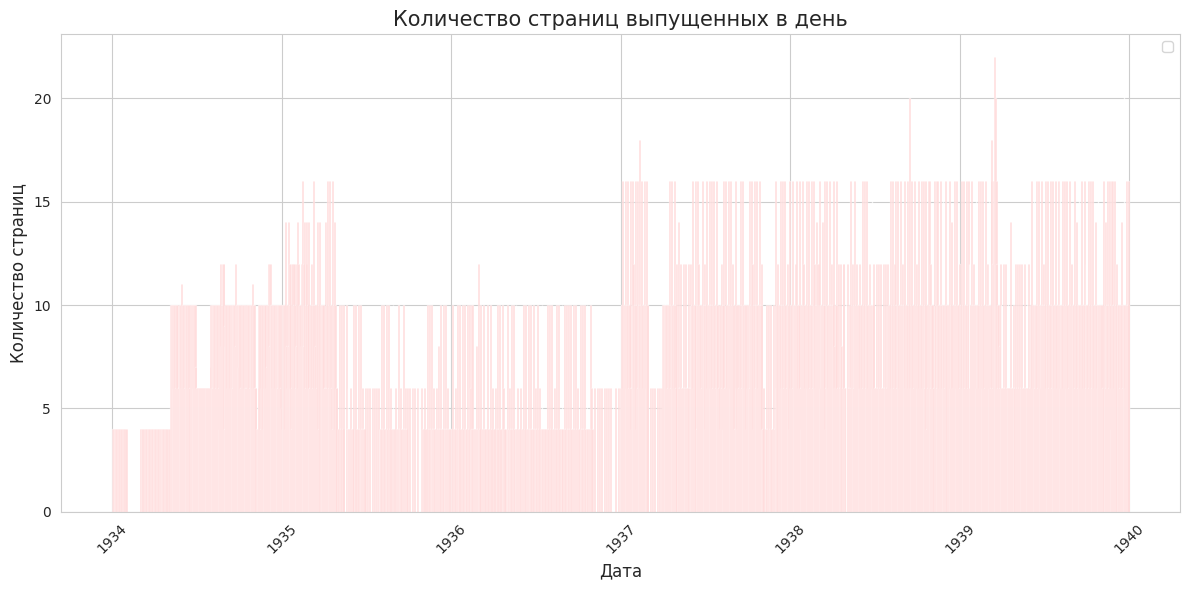

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Пример данных (замените на ваш датафрейм)

# Преобразуем строки с датами в тип datetime
dc['Дата'] = pd.to_datetime(dc['newspaper_date'], format='%d-%m-%Y')
dc['Кол-во страниц'] = dc['origin_img']
# Сортировка по дате (на всякий случай)
dc = dc.sort_values('Дата')


# Настройка стиля
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Линейный график
#plt.plot(dc['Дата'], dc['origin_img'], linestyle='-', color='b', label='События')

# Или столбчатая диаграмма (раскомментируйте, если нужно)
plt.bar(dc['Дата'], dc['origin_img'], color='red', alpha=0.7,width=2)

# Настройка оформления
plt.title('Количество страниц выпущенных в день', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество страниц', fontsize=12)
plt.xticks(rotation=45)
#plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()  # Чтобы подписи не обрезались
plt.legend()
plt.show()

In [151]:
dd = db.groupby(['newspaper_date','newspaper']).count().reset_index()
dd

,newspaper_date,newspaper,origin_img,page,boxes
0,01-01-1934,Вечерняя Москва,4,4,4
1,01-01-1935,Вечерняя Москва,4,4,4
2,01-01-1935,Правда,6,6,6
3,01-01-1937,Правда,6,6,6
4,01-01-1938,Правда,6,6,6
...,...,...,...,...,...
3097,31-12-1938,Литературная газета,6,6,6
3098,31-12-1938,Правда,6,6,6
3099,31-12-1939,Вечерняя Москва,4,4,4
3100,31-12-1939,Литературная газета,6,6,6


/tmp/ipykernel_31/2020976527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['Дата'] = pd.to_datetime(dg['newspaper_date'], format='%d-%m-%Y')
/tmp/ipykernel_31/2020976527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['Кол-во страниц'] = dg['origin_img']


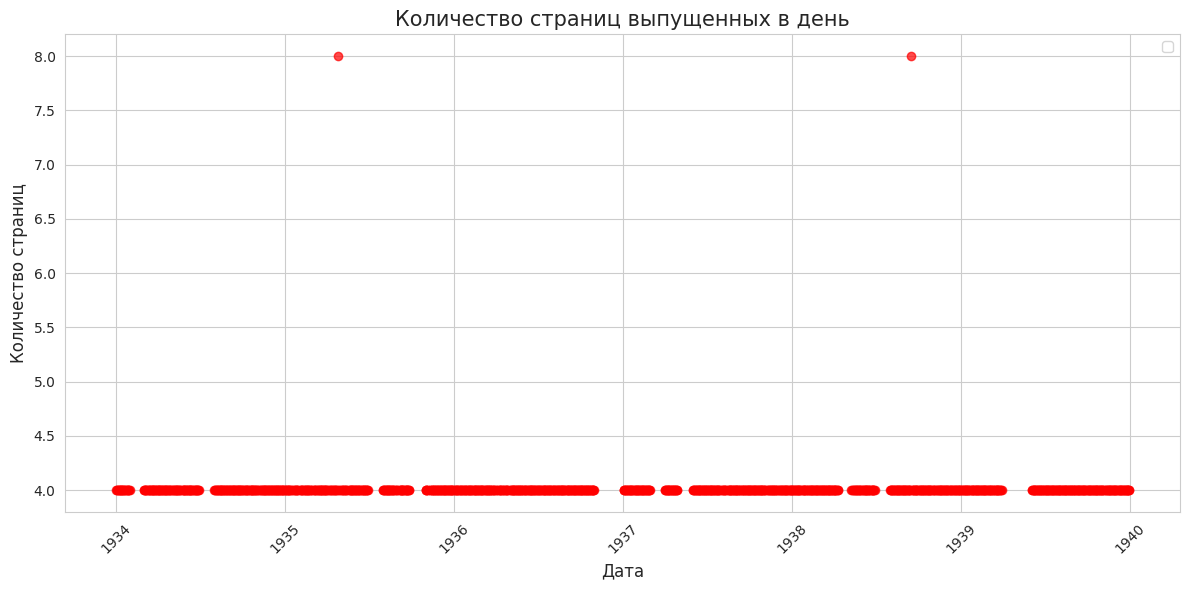

/tmp/ipykernel_31/2020976527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['Дата'] = pd.to_datetime(dg['newspaper_date'], format='%d-%m-%Y')
/tmp/ipykernel_31/2020976527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['Кол-во страниц'] = dg['origin_img']


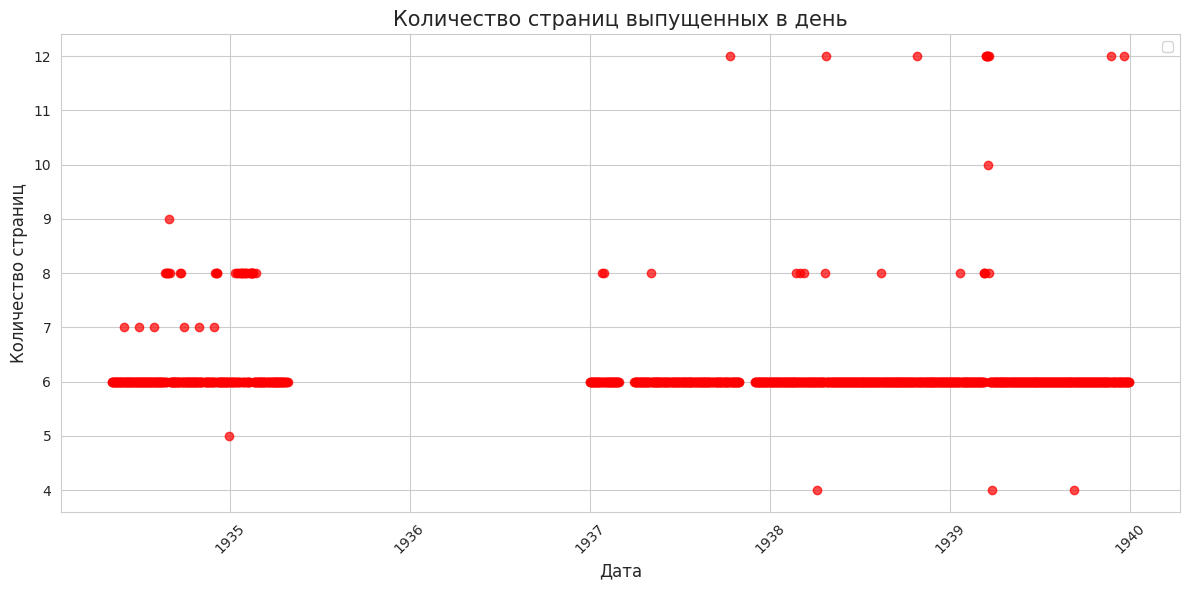

/tmp/ipykernel_31/2020976527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['Дата'] = pd.to_datetime(dg['newspaper_date'], format='%d-%m-%Y')
/tmp/ipykernel_31/2020976527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['Кол-во страниц'] = dg['origin_img']


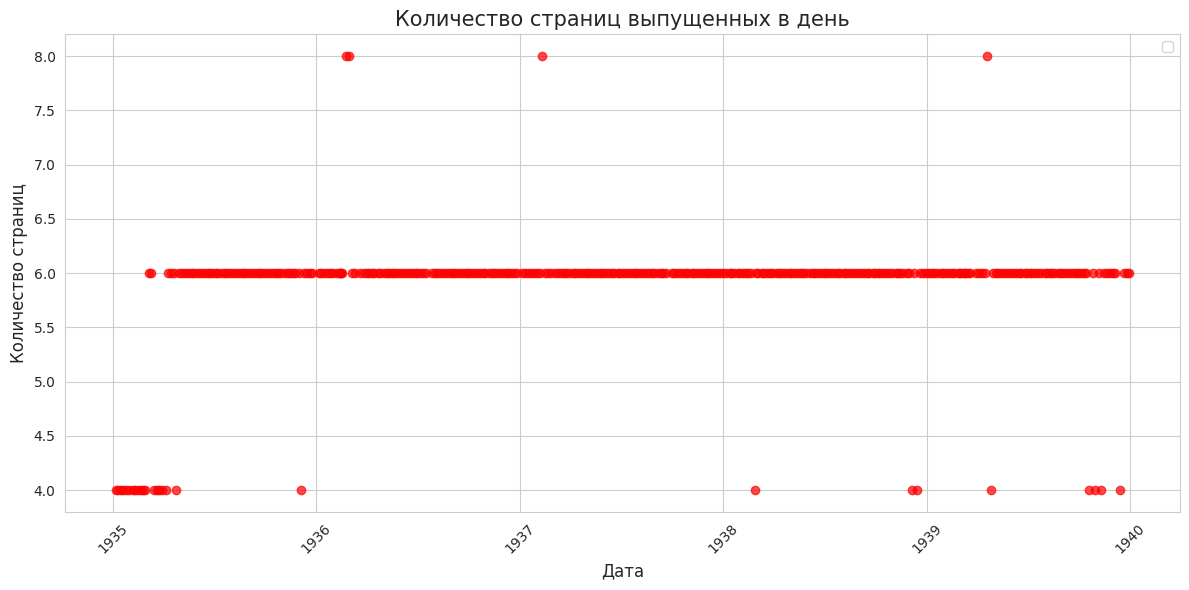

In [158]:
for item in ['Вечерняя Москва','Правда','Литературная газета']:
    dg = dd[dd['newspaper'] == item]
    dg['Дата'] = pd.to_datetime(dg['newspaper_date'], format='%d-%m-%Y')
    dg['Кол-во страниц'] = dg['origin_img']
    dg = dg.sort_values('Дата')
    # Настройка стиля
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
    
    # Линейный график
    #plt.plot(dc['Дата'], dc['origin_img'], linestyle='-', color='b', label='События')
    
    # Или столбчатая диаграмма (раскомментируйте, если нужно)
    plt.scatter(dg['Дата'], dg['Кол-во страниц'], color='red', alpha=0.7)
    
    # Настройка оформления
    plt.title('Количество страниц выпущенных в день', fontsize=15)
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel('Количество страниц', fontsize=12)
    plt.xticks(rotation=45)
    #plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()  # Чтобы подписи не обрезались
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Пример данных (замените на ваш датафрейм)

# Преобразуем строки с датами в тип datetime
dc['Дата'] = pd.to_datetime(dc['newspaper_date'], format='%d-%m-%Y')
dc['Кол-во страниц'] = dc['origin_img']
# Сортировка по дате (на всякий случай)
dc = dc.sort_values('Дата')


# Настройка стиля
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Линейный график
#plt.plot(dc['Дата'], dc['origin_img'], linestyle='-', color='b', label='События')

# Или столбчатая диаграмма (раскомментируйте, если нужно)
plt.bar(dc['Дата'], dc['origin_img'], color='red', alpha=0.7,width=2)

# Настройка оформления
plt.title('Количество страниц выпущенных в день', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество страниц', fontsize=12)
plt.xticks(rotation=45)
#plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()  # Чтобы подписи не обрезались
plt.legend()
plt.show()